In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./FMCG_mod.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)

            Date     Symbol Series  Prev Close     Open     High      Low  \
0     2015-01-01  NESTLEIND     EQ     6384.85  6385.00  6400.00  6300.00   
1     2015-01-02  NESTLEIND     EQ     6317.95  6256.05  6366.50  6256.05   
2     2015-01-05  NESTLEIND     EQ     6331.50  6370.00  6370.00  6290.00   
3     2015-01-06  NESTLEIND     EQ     6334.90  6296.00  6313.05  6220.00   
4     2015-01-07  NESTLEIND     EQ     6246.80  6265.00  6308.95  6247.55   
...          ...        ...    ...         ...      ...      ...      ...   
6259  2021-04-26  BRITANNIA     EQ     3650.30  3661.10  3662.00  3531.00   
6260  2021-04-27  BRITANNIA     EQ     3539.20  3572.70  3574.60  3517.00   
6261  2021-04-28  BRITANNIA     EQ     3541.20  3488.00  3527.00  3469.00   
6262  2021-04-29  BRITANNIA     EQ     3478.75  3496.75  3505.90  3447.00   
6263  2021-04-30  BRITANNIA     EQ     3468.90  3460.00  3468.35  3437.00   

         Last    Close     VWAP   Volume      Turnover  Trades  \
0     632

In [3]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)].values
        y = data.iloc[i + sequence_length].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [4]:
def train_model_for_stock(stock_df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_df['Close'].values.reshape(-1,1))

    sequence_length = 60
    X, y = create_sequences(pd.DataFrame(scaled_data), sequence_length)

    # Split data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=20)

    # Calculate RMSE and MSE for training
    trainPredict = model.predict(X_train)
    trainScore_RMSE = sqrt(mean_squared_error(y_train, trainPredict))
    trainScore_MSE = mean_squared_error(y_train, trainPredict)

    # Calculate RMSE and MSE for testing
    testPredict = model.predict(X_test)
    testScore_RMSE = sqrt(mean_squared_error(y_test, testPredict))
    testScore_MSE = mean_squared_error(y_test, testPredict)

    return trainScore_RMSE, trainScore_MSE, testScore_RMSE, testScore_MSE, scaler.inverse_transform(testPredict), y_test, scaler.inverse_transform(y_test)

In [5]:
def plot_predictions(stock_name, true_values, predictions):
    plt.figure(figsize=(14,7))
    plt.plot(true_values, label='Actual Close Price')
    plt.plot(predictions, label='Predicted Close Price', alpha=0.7)
    plt.title(f'{stock_name} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [6]:
# Create a DataFrame to store the RMSE and MSE values
# Columns: 'Stock', 'Train_RMSE', 'Train_MSE', 'Test_RMSE', 'Test_MSE'
performance_df = pd.DataFrame(columns=['Stock', 'Train_RMaSE', 'Train_MSE', 'Test_RMSE', 'Test_MSE'])

Processing NESTLEIND...
Epoch 1/20
38/38 [==============================] - 5s 35ms/step - loss: 0.0129
Epoch 2/20
38/38 [==============================] - 1s 30ms/step - loss: 6.5285e-04
Epoch 3/20
38/38 [==============================] - 1s 34ms/step - loss: 5.0791e-04
Epoch 4/20
38/38 [==============================] - 1s 36ms/step - loss: 4.8270e-04
Epoch 5/20
38/38 [==============================] - 1s 32ms/step - loss: 4.9399e-04
Epoch 6/20
38/38 [==============================] - 1s 32ms/step - loss: 4.7984e-04
Epoch 7/20
38/38 [==============================] - 1s 31ms/step - loss: 4.5917e-04
Epoch 8/20
38/38 [==============================] - 1s 34ms/step - loss: 4.3157e-04
Epoch 9/20
38/38 [==============================] - 1s 31ms/step - loss: 4.2611e-04
Epoch 10/20
38/38 [==============================] - 1s 33ms/step - loss: 4.1509e-04
Epoch 11/20
38/38 [==============================] - 1s 33ms/step - loss: 3.9131e-04
Epoch 12/20
38/38 [==============================] - 1

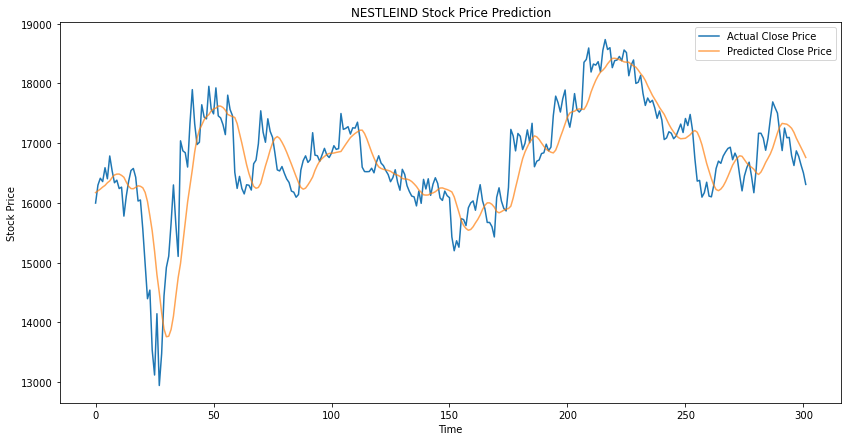

Processing HINDUNILVR...
Epoch 1/20
38/38 [==============================] - 4s 33ms/step - loss: 0.0140
Epoch 2/20
38/38 [==============================] - 1s 34ms/step - loss: 5.8808e-04
Epoch 3/20
38/38 [==============================] - 1s 31ms/step - loss: 5.0338e-04
Epoch 4/20
38/38 [==============================] - 1s 34ms/step - loss: 4.7599e-04
Epoch 5/20
38/38 [==============================] - 1s 32ms/step - loss: 4.7094e-04
Epoch 6/20
38/38 [==============================] - 1s 33ms/step - loss: 4.5516e-04
Epoch 7/20
38/38 [==============================] - 1s 34ms/step - loss: 4.4333e-04
Epoch 8/20
38/38 [==============================] - 1s 31ms/step - loss: 5.5320e-04
Epoch 9/20
38/38 [==============================] - 1s 34ms/step - loss: 4.5538e-04
Epoch 10/20
38/38 [==============================] - 1s 32ms/step - loss: 4.8614e-04
Epoch 11/20
38/38 [==============================] - 1s 32ms/step - loss: 4.2213e-04
Epoch 12/20
38/38 [==============================] - 

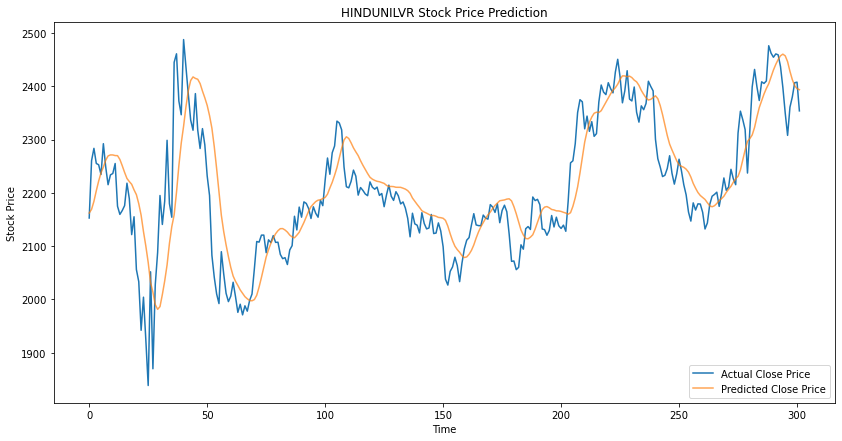

Processing ITC...
Epoch 1/20
38/38 [==============================] - 4s 36ms/step - loss: 0.0374
Epoch 2/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0035
Epoch 3/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0026
Epoch 4/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0022
Epoch 5/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0021
Epoch 6/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0019
Epoch 7/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0019
Epoch 8/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0018
Epoch 9/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0018
Epoch 10/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0017
Epoch 11/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0017
Epoch 12/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0016
Epoch 13/20
38/38 [

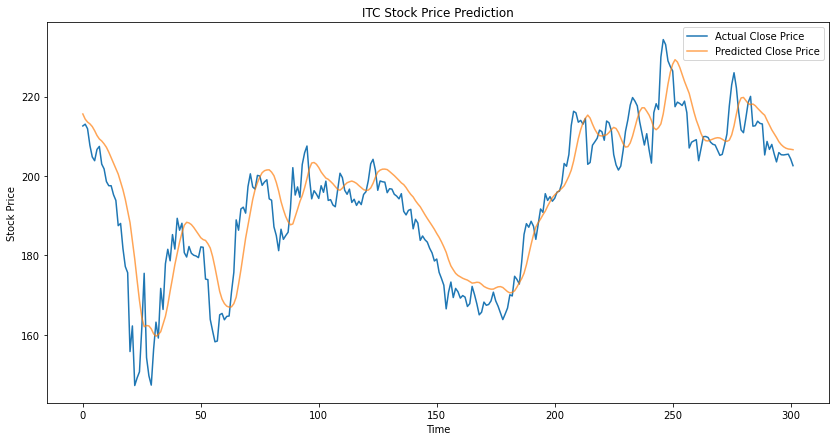

Processing BRITANNIA...
Epoch 1/20
38/38 [==============================] - 4s 35ms/step - loss: 0.0176
Epoch 2/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0022
Epoch 3/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0020
Epoch 4/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 5/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0019
Epoch 6/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0020
Epoch 7/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0017
Epoch 8/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0016
Epoch 9/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0014
Epoch 10/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0015
Epoch 11/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0014
Epoch 12/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0013
Epoch 13/20
3

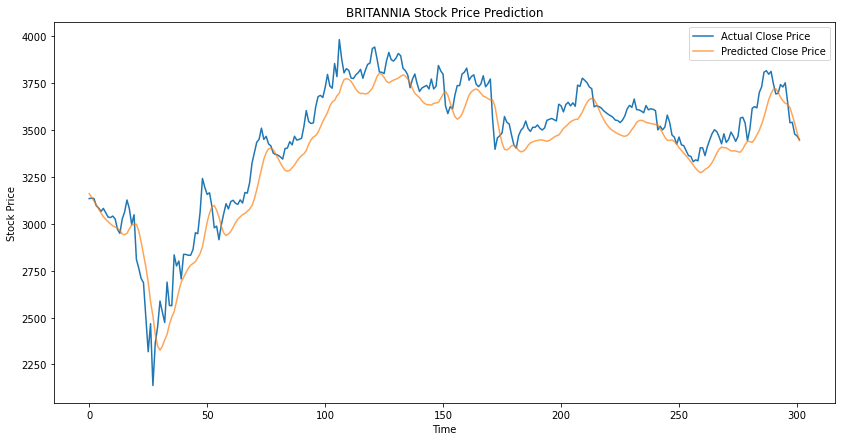

In [7]:
unique_stocks = df['Symbol'].unique()

# Initialize an empty list to store performance metrics for each stock
performance_list = []

for stock in unique_stocks:
    stock_df = df[df['Symbol'] == stock]
    if len(stock_df) > 2 * 60:  # Ensure there's enough data
        print(f"Processing {stock}...")
        trainScore_RMSE, trainScore_MSE, testScore_RMSE, testScore_MSE, predictions, y_test, true_values = train_model_for_stock(stock_df)
        plot_predictions(stock, true_values, predictions)
        
        # Create a dictionary with the performance metrics
        current_stock_performance = {
            'Stock': stock,  # Replace with the actual stock name
            'Train_RMSE': trainScore_RMSE,
            'Train_MSE': trainScore_MSE,
            'Test_RMSE': testScore_RMSE,
            'Test_MSE': testScore_MSE
        }
        
        # Append the dictionary to the list
        performance_list.append(current_stock_performance)

# Create a DataFrame from the list of dictionaries
performance_df = pd.DataFrame(performance_list)

# Now 'performance_df' contains the RMSE and MSE values for all stocks

In [8]:
performance_df

,Stock,Train_RMSE,Train_MSE,Test_RMSE,Test_MSE
0,NESTLEIND,0.016822,0.000283,0.038133,0.001454
1,HINDUNILVR,0.019487,0.000380,0.041558,0.001727
2,ITC,0.033606,0.001129,0.031041,0.000964
3,BRITANNIA,0.034588,0.001196,0.023827,0.000568
